In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('data.csv')

Импортируем датасет как датафрейм пандас

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Data columns (total 29 columns):
age                                     20468 non-null int64
annualincome                            20468 non-null int64
calldroprate                            20468 non-null float64
callfailurerate                         20468 non-null float64
callingnum                              20468 non-null int64
customerid                              20468 non-null int64
customersuspended                       20468 non-null object
education                               20468 non-null object
gender                                  20468 non-null object
homeowner                               20468 non-null object
maritalstatus                           20468 non-null object
monthlybilledamount                     20468 non-null int64
noadditionallines                       20468 non-null object
numberofcomplaints                      20468 non-null int64
numberofmonthunpaid        

Похоже, что датасет состоит из данных разных типов: категорийных, дамми и числовых. При этом, часть данных явно не имеют прогнозных значений и будут вычищены. Данные хорошего качества, нет null values.

In [4]:
df.head()

,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,customersuspended,education,gender,homeowner,...,totalminsusedinlastmonth,unpaidbalance,usesinternetservice,usesvoiceservice,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn,year,month
0,12,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,...,15,19,No,No,0.82,5971,663,0,2015,1
1,12,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,...,15,19,No,No,0.82,3981,995,0,2015,2
2,42,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,...,212,34,No,Yes,0.27,7379,737,0,2015,1
3,42,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,...,212,34,No,Yes,0.27,1729,432,0,2015,2
4,58,27076,0.07,0.02,4251055773,3,Yes,Master or equivalent,Female,Yes,...,216,144,No,No,0.48,3122,624,0,2015,1


Похоже, что ID некоторых пользователей дублируются, т.к. идёт сбор данных более чем за один месяц. Это может быть хорошим критерием оценки, уйдёт человек или нет, т.к. лояльные клиенты меньше меняют свои привычки. При этом непонятно заполнение в графе "образование" бакалавр в 12 лет, возможно, часть данных не соответствует действительности

In [5]:
df['churn'].value_counts()

0    18605
1     1863
Name: churn, dtype: int64

Похоже, что отток идёт порядка 10% от общего числа записей.

In [6]:
corr = df.corr()
corr['churn']

age                                    -0.137655
annualincome                           -0.001800
calldroprate                            0.006906
callfailurerate                         0.003483
callingnum                             -0.009410
customerid                              0.002439
monthlybilledamount                     0.009842
numberofcomplaints                      0.054646
numberofmonthunpaid                     0.005232
numdayscontractequipmentplanexpiring   -0.017892
penaltytoswitch                        -0.002050
totalminsusedinlastmonth                0.003791
unpaidbalance                           0.047482
percentagecalloutsidenetwork           -0.012896
totalcallduration                      -0.010087
avgcallduration                        -0.001881
churn                                   1.000000
year                                         NaN
month                                   0.004760
Name: churn, dtype: float64

In [7]:
df.describe()

,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,monthlybilledamount,numberofcomplaints,numberofmonthunpaid,numdayscontractequipmentplanexpiring,penaltytoswitch,totalminsusedinlastmonth,unpaidbalance,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn,year,month
count,20468.000000,20468.000000,20468.000000,20468.000000,2.046800e+04,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,20468.000000
mean,45.334327,124446.818253,0.035021,0.015239,4.220203e+09,4757.953342,59.630252,1.499169,3.489252,49.366816,248.792603,249.740522,126.656879,0.496528,3521.696306,721.521057,0.091020,2015.0,1.611687
std,19.624577,72129.392001,0.022996,0.011213,3.365196e+08,2751.070062,34.652681,1.119153,2.289740,28.874138,144.247247,144.198066,70.367800,0.288220,1959.642260,225.677596,0.287645,0.0,0.621895
min,12.000000,4.000000,0.000000,0.000000,1.022955e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.0,1.000000
25%,28.000000,61898.000000,0.010000,0.010000,4.251031e+09,2372.750000,29.000000,0.000000,1.000000,24.000000,124.000000,126.000000,66.000000,0.250000,2047.750000,582.000000,0.000000,2015.0,1.000000
50%,45.000000,123689.500000,0.040000,0.020000,4.251054e+09,4754.000000,60.000000,2.000000,3.000000,49.000000,249.000000,249.000000,122.000000,0.500000,3365.000000,721.000000,0.000000,2015.0,2.000000
75%,62.000000,187065.250000,0.060000,0.030000,4.251077e+09,7141.250000,90.000000,3.000000,5.000000,74.000000,373.000000,374.000000,191.000000,0.750000,4786.250000,862.000000,0.000000,2015.0,2.000000
max,79.000000,249987.000000,0.070000,0.030000,4.251100e+09,9525.000000,119.000000,3.000000,7.000000,99.000000,499.000000,499.000000,249.000000,0.990000,16662.000000,1439.000000,1.000000,2015.0,3.000000


In [8]:
df.shape

(20468, 29)

In [9]:
df = df.drop(['year','callingnum'], axis = 1)

Отбрасываем колонки 'year', т.к. год всего один, 'callingnum' , т.к. знание номера телефона ничего не даст нам с точки зрения анализа.

In [10]:
df['maritalstatus'].value_counts()

Single     10446
Married    10022
Name: maritalstatus, dtype: int64

In [11]:
df.select_dtypes(include=['object']).head()

,customersuspended,education,gender,homeowner,maritalstatus,noadditionallines,occupation,state,usesinternetservice,usesvoiceservice
0,Yes,Bachelor or equivalent,Male,Yes,Single,\N,Technology Related Job,WA,No,No
1,Yes,Bachelor or equivalent,Male,Yes,Single,\N,Technology Related Job,WA,No,No
2,Yes,Bachelor or equivalent,Female,Yes,Single,\N,Technology Related Job,WI,No,Yes
3,Yes,Bachelor or equivalent,Female,Yes,Single,\N,Technology Related Job,WI,No,Yes
4,Yes,Master or equivalent,Female,Yes,Single,\N,Technology Related Job,KS,No,No


In [12]:
df = df.replace('Yes', 1).replace('No', 0).replace('Male', 1).replace('Female', 0).replace('Single', 0).replace('Married', 1)

Проверяем количество текстовых данных. Необходимо максимально уменьшить их количество, для того, чтобы легче было провести анализ. Большинство из них можно свести в категорийные или dummy. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Data columns (total 27 columns):
age                                     20468 non-null int64
annualincome                            20468 non-null int64
calldroprate                            20468 non-null float64
callfailurerate                         20468 non-null float64
customerid                              20468 non-null int64
customersuspended                       20468 non-null int64
education                               20468 non-null object
gender                                  20468 non-null int64
homeowner                               20468 non-null int64
maritalstatus                           20468 non-null int64
monthlybilledamount                     20468 non-null int64
noadditionallines                       20468 non-null object
numberofcomplaints                      20468 non-null int64
numberofmonthunpaid                     20468 non-null int64
numdayscontractequipmentplanexp

In [14]:
df.select_dtypes(include=['object']).head()

,education,noadditionallines,occupation,state
0,Bachelor or equivalent,\N,Technology Related Job,WA
1,Bachelor or equivalent,\N,Technology Related Job,WA
2,Bachelor or equivalent,\N,Technology Related Job,WI
3,Bachelor or equivalent,\N,Technology Related Job,WI
4,Master or equivalent,\N,Technology Related Job,KS


In [15]:
df['education'].value_counts()

High School or below      10217
Bachelor or equivalent     6138
Master or equivalent       3099
PhD or equivalent          1014
Name: education, dtype: int64

In [16]:
df['noadditionallines'].value_counts()

\N    20468
Name: noadditionallines, dtype: int64

In [17]:
df['occupation'].value_counts()

Others                        8189
Non-technology Related Job    6189
Technology Related Job        6090
Name: occupation, dtype: int64

In [18]:
df['state'].value_counts()

HI    478
MD    469
NY    468
AK    461
FL    459
NH    455
WY    454
MN    451
KY    450
AZ    450
CA    449
PA    448
WA    444
CO    442
MT    442
WI    440
TX    437
OH    435
SD    427
ND    427
UT    425
DE    423
IN    423
IA    418
ID    411
VA    407
SC    404
LA    400
MS    398
MA    398
NV    397
KS    395
OR    394
NM    390
MI    388
IL    377
MO    377
NJ    377
RI    376
VT    373
OK    372
NE    371
ME    361
NC    360
TN    356
WV    351
CT    350
GA    339
AR    337
AL    334
Name: state, dtype: int64

In [19]:
df = df.drop('noadditionallines', axis = 1)

Удаляем колонну 'noadditionallines' , т.к. она, как и колонна 'year' содержит одинаковые значения

In [20]:
df.dtypes

age                                       int64
annualincome                              int64
calldroprate                            float64
callfailurerate                         float64
customerid                                int64
customersuspended                         int64
education                                object
gender                                    int64
homeowner                                 int64
maritalstatus                             int64
monthlybilledamount                       int64
numberofcomplaints                        int64
numberofmonthunpaid                       int64
numdayscontractequipmentplanexpiring      int64
occupation                               object
penaltytoswitch                           int64
state                                    object
totalminsusedinlastmonth                  int64
unpaidbalance                             int64
usesinternetservice                       int64
usesvoiceservice                        

In [21]:
df['month'].value_counts()

1    9475
2    9466
3    1527
Name: month, dtype: int64

In [22]:
df['age'][(df['education'] == 'Bachelor or equivalent')&(df['age']<=20)].value_counts().sum()

848

In [23]:
df['age'][(df['education'] == 'Master or equivalent')&(df['age']<=20)].value_counts().sum()

414

In [24]:
df['age'][df['age']<=20].value_counts().sum()

2764

Похоже, что есть сомнения в том, что в данных по образованию были указаны правдивые сведения, т.к. трудно представить себе такое количество 12-летних бакалавров и магистров

In [25]:
df.select_dtypes(include=['object']).columns

Index(['education', 'occupation', 'state'], dtype='object')

In [26]:
df_dummy = pd.get_dummies(df[['education', 'occupation']])

Переводим категорийные колонны в дамми колонны, для того, чтобы в модели можно было оценивать их вклад.

In [27]:
%matplotlib inline

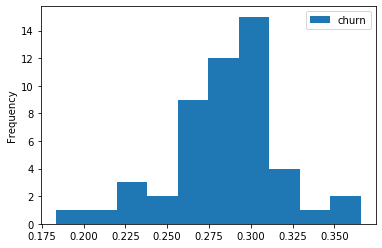

In [28]:
df[['state','churn']].groupby('state').agg(np.std).plot(kind = 'hist')

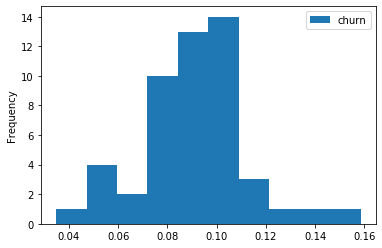

In [29]:
df[['state','churn']].groupby('state').agg(np.mean).plot(kind = 'hist')

In [30]:
import scipy as sp
from scipy import stats

def normal_distribution_test(column):
    a = df[[column,'churn']].groupby(column).agg(np.std)
    k2, p = sp.stats.normaltest(a, axis=0, nan_policy='propagate')
    alpha = 1e-3
    print("p value = ",p)
    if p < alpha:  # null hypothesis: a comes from a normal distribution
        print("The null hypothesis can be rejected std does not come from a normal distribution, column = ", column)
    else:
        print("The null hypothesis cannot be rejected std comes from a normal distribution, column = ", column)
    
    b = df[[column,'churn']].groupby(column).agg(np.mean)
    k2, p = sp.stats.normaltest(b, axis=0, nan_policy='propagate')
    alpha = 1e-3
    print("p value = ",p)
    if p < alpha:  # null hypothesis: b comes from a normal distribution
        print("The null hypothesis can be rejected mean does not come from a normal distribution, column = ", column)
    else:
        print("The null hypothesis cannot be rejected mean comes from a normal distribution, column = ", column)
    
normal_distribution_test('state')


p value =  [0.02909084]
The null hypothesis cannot be rejected std comes from a normal distribution, column =  state
p value =  [0.15304819]
The null hypothesis cannot be rejected mean comes from a normal distribution, column =  state


Похоже, что распределение по штатам носит характер, похожий на характер нормального распределения. Мы не отвергаем гипотезу о том, что он подчиняется закону нормального распределения. Т.к. это категорийный признак, мы исключаем его из дальнейшего анализа

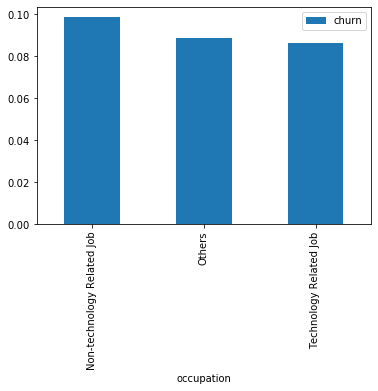

In [31]:
df[['occupation','churn']].groupby('occupation').agg(np.mean).plot(kind = 'bar') 

In [32]:
df.select_dtypes(include=['object']).head()

,education,occupation,state
0,Bachelor or equivalent,Technology Related Job,WA
1,Bachelor or equivalent,Technology Related Job,WA
2,Bachelor or equivalent,Technology Related Job,WI
3,Bachelor or equivalent,Technology Related Job,WI
4,Master or equivalent,Technology Related Job,KS


In [33]:
df = pd.concat([df, df_dummy], axis=1, ignore_index=False)
df = df.drop(['education', 'occupation', 'state'],axis = 1)
cols_to_rename = {
    'education_Bachelor or equivalent':'bachelor', 
    'education_High School or below':'highschool',
    'education_Master or equivalent':'master',
    'education_PhD or equivalent':'phd',
    'occupation_Non-technology Related Job':'nontechnologyrelatedjob',
    'occupation_Others':'occupationothers',
    'occupation_Technology Related Job':'technologyrelatedjob'
    }
df = df.rename(columns=cols_to_rename)
print(df.columns,df.shape)

Index(['age', 'annualincome', 'calldroprate', 'callfailurerate', 'customerid',
       'customersuspended', 'gender', 'homeowner', 'maritalstatus',
       'monthlybilledamount', 'numberofcomplaints', 'numberofmonthunpaid',
       'numdayscontractequipmentplanexpiring', 'penaltytoswitch',
       'totalminsusedinlastmonth', 'unpaidbalance', 'usesinternetservice',
       'usesvoiceservice', 'percentagecalloutsidenetwork', 'totalcallduration',
       'avgcallduration', 'churn', 'month', 'bachelor', 'highschool', 'master',
       'phd', 'nontechnologyrelatedjob', 'occupationothers',
       'technologyrelatedjob'],
      dtype='object') (20468, 30)


Подготавливаем данные для того, чтобы использовать их в дальнейшем в нейросети. Я выбрал библиотеку Tensorflow для запуска нейросети, а у неё есть строгие критерии по входящим данным и колонкам, в т.ч. по типам и по отсутствию элементов регулярных выражений в названии колонок.

In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

e:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
e:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
e:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
e:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is d

Импортируем необходимые библиотеки для работы нейросети

In [35]:
# Use a utility from sklearn to split and shuffle our dataset.
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

13099 train examples
3275 validation examples
4094 test examples


Разбиваем датасет на три части, тренировочную, проверочную и тестовую и придаём ей случайный порядок

In [36]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('churn')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

Конвертируем датасет в формат библиотеки Tensorflow из датафрейма Pandas

In [37]:
feature_columns = []

for header in ['age', 'annualincome', 'calldroprate', 'callfailurerate', 'customerid', 'customersuspended', 'gender', 'homeowner', 'maritalstatus', 'monthlybilledamount', 'numberofcomplaints', 'numberofmonthunpaid', 'numdayscontractequipmentplanexpiring', 'penaltytoswitch', 'totalminsusedinlastmonth', 'unpaidbalance', 'usesinternetservice', 'usesvoiceservice', 'percentagecalloutsidenetwork', 'totalcallduration', 'avgcallduration', 'month', 'bachelor', 'highschool', 'master', 'phd', 'nontechnologyrelatedjob', 'occupationothers', 'technologyrelatedjob']:
  feature_columns.append(feature_column.numeric_column(header))



Идентифицируем все колонны как числовые, т.к. до этого мы перевели всё в формат dummy переменных

In [38]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [39]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

Переводим датафреймы в датасет Tensorflow, задаём размер батчей, на который делится датасет

In [40]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

Использую стандартную модель рекурентной нейросети для таких датасетов, входящий слой с числом параметров равным числу колонок, два внутренних слоя с активацией Relu и одним выходным слоем с активацией сигмоидой (чтобы вывести бинарное значение признака)

In [41]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)

Epoch 1/5
410/410 [==============================] - 3s 7ms/step - loss: 287.3553 - accuracy: 0.8281 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
410/410 [==============================] - 1s 3ms/step - loss: 176.3184 - accuracy: 0.8353 - val_loss: 221.6079 - val_accuracy: 0.1145
Epoch 3/5
410/410 [==============================] - 1s 3ms/step - loss: 101.4027 - accuracy: 0.8299 - val_loss: 106.2804 - val_accuracy: 0.9108
Epoch 4/5
410/410 [==============================] - 1s 3ms/step - loss: 111.1793 - accuracy: 0.8278 - val_loss: 48.1383 - val_accuracy: 0.3844
Epoch 5/5
410/410 [==============================] - 1s 3ms/step - loss: 62.1624 - accuracy: 0.8312 - val_loss: 107.0032 - val_accuracy: 0.9108


Модель обучается, сделал 5 эпох, при большем количестве идёт сильное переобучение и качество модели падает

In [43]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy, "Loss", loss)

128/128 [==============================] - 0s 4ms/step - loss: 104.3157 - accuracy: 0.9145
Accuracy 0.91450906 Loss 104.31571576846868


Получили неплохие показатели по accuracy (отношение правильных ответов ко всем) на тестовых данных. Модель пригодна для того, чтобы делать предсказания на тестовых данных и имеет предсказательную силу. 

In [44]:
predictions = model.predict(test_ds)
predicted_val = [int(round(p[0])) for p in predictions]
submission_df = pd.DataFrame({'test_index':test.index,'predicted_churn':predicted_val})


submission_df.to_csv("submission.csv", index=False)

In [45]:
submission_df

,test_index,predicted_churn
0,5009,0
1,4159,0
2,15129,0
3,19994,0
4,18063,0
...,...,...
4089,13055,0
4090,12175,0
4091,13332,0
4092,19561,0
